
# Importation des librairies

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from adtk.detector import ThresholdAD
from tslearn.clustering import TimeSeriesKMeans
from sklearn.model_selection import GridSearchCV

# Chargement du dataset

In [2]:
data = pd.read_csv('20210610_pf-envtest_batteryMilliVolts.csv',low_memory=False)

In [3]:
df = data.copy()

# Exploration des données 🗺️

In [4]:
df

,_id,id,externalId,name,pfVehicleId,type,value,dateTime,providerType,metaDataProvider
0,6063834e304a3d000e1cf0f2,c93b15d6-e7ce-4e82-8d64-5ebb1a50b3a5,212014918914083,PF-65062,PF-65062,batteryMilliVolts,5412.0,2020-07-31T02:21:40Z,Samsara,"{""batteryMilliVolts"":{""time"":""2020-07-31T02:21..."
1,6063834e304a3d000e1cf0f9,9e77fdd9-c7ad-42f7-b703-f040b2eb5007,212014918915100,ST-14867,ST-14867,batteryMilliVolts,25864.0,2021-03-30T19:18:24Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T19:18..."
2,6063834e304a3d000e1cf10d,b7cf79a0-7c2e-42fc-9955-b34dc998670b,212014918915223,PF-78663,PF-78663,batteryMilliVolts,1211.0,2021-03-30T10:51:17Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T10:51..."
3,6063834e304a3d000e1cf112,86382b2f-7315-40a1-aa8e-eea795191f85,844424930157962,98729,98729,batteryMilliVolts,14469.0,2021-03-30T19:59:34Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T19:59..."
4,6063834e304a3d000e1cf103,d124506b-59f1-4612-9df5-9797a964a040,212014918886624,PF-80093,PF-80093,batteryMilliVolts,12525.0,2021-03-30T19:13:39Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-03-30T19:13..."
...,...,...,...,...,...,...,...,...,...,...
3574452,6075ed59c577c4000c603916,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12835.0,2021-04-13T19:03:17Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T19:03..."
3574453,6075ed59c577c4000c603917,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12839.0,2021-04-13T18:53:15Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T18:53..."
3574454,6075ed59c577c4000c603918,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12837.0,2021-04-13T18:55:17Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T18:55..."
3574455,6075ed59c577c4000c603919,da2a2a9d-c527-454d-b1e0-f4fdbd6480c8,212014918886645,PF-83980,PF-83980,batteryMilliVolts,12833.0,2021-04-13T18:51:15Z,Samsara,"{""batteryMilliVolts"":{""time"":""2021-04-13T18:51..."


In [29]:
df['name'].value_counts()

PF-65062        29108
PF-72713        12446
PF-77174        12188
PF-79504        12002
PF-77277        11644
                ...  
GGCM-G2E-UFW        2
GJ3A-N4C-BNC        1
GJDV-879-WJ6        1
GAW9-KC9-ZKA        1
GZJ3-CX3-UXE        1
Name: name, Length: 708, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3574457 entries, 0 to 3574456
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   _id               object 
 1   id                object 
 2   externalId        int64  
 3   name              object 
 4   pfVehicleId       object 
 5   type              object 
 6   value             float64
 7   dateTime          object 
 8   providerType      object 
 9   metaDataProvider  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 272.7+ MB


In [6]:
df.describe()

,externalId,value
count,3.574457e+06,3.574456e+06
mean,2.840674e+14,1.557305e+04
std,2.009357e+14,5.370761e+03
min,2.120149e+14,0.000000e+00
25%,2.120149e+14,1.253000e+04
50%,2.120149e+14,1.279000e+04
75%,2.120149e+14,1.449800e+04
max,8.444249e+14,3.297800e+04


# Preprocessing - nettoyage des données 🧹

### Supression colonnes

In [14]:
missing_rate = df.isna().sum()/df.shape[0] # affiche le pourcentage de valeurs nulles par colonnes
missing_rate.sort_values(ascending=False)

id                  4.143287e-04
value               2.797628e-07
dateTime            2.797628e-07
providerType        2.797628e-07
metaDataProvider    2.797628e-07
_id                 0.000000e+00
externalId          0.000000e+00
name                0.000000e+00
pfVehicleId         0.000000e+00
type                0.000000e+00
dtype: float64

Ici les valeurs manquantes sont de l'ordre de 10^-4, négligeables pour la suppression => on choisit de ne pas supprimer des colonnes sur ce critère.

In [4]:
df = df.drop(["_id","type","metaDataProvider","pfVehicleId","providerType"], axis=1)

### Supression lignes NaN

In [5]:
df = df.dropna(subset = ['name','value','dateTime']) # supression des lignes nulles par rapport à ces variables

### Normalisation des données

In [6]:
from sklearn.preprocessing import RobustScaler

In [7]:
battery_as_array = np.array(df["value"]).reshape(-1, 1)
df["battery_normalized"]= RobustScaler().fit_transform(battery_as_array)        
df["battery_normalized"].value_counts()

-0.004573    5488
-0.005589    5484
 0.011179    5381
 0.013211    5381
-0.003557    5349
             ... 
-2.368902       1
-2.423272       1
-2.374492       1
-2.504065       1
 3.132114       1
Name: battery_normalized, Length: 19403, dtype: int64

In [8]:
rs_inverse = RobustScaler().fit(battery_as_array)#dénormalise

## Histogrammes des variables explicatives numériques 📊

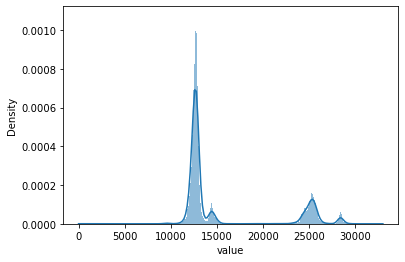

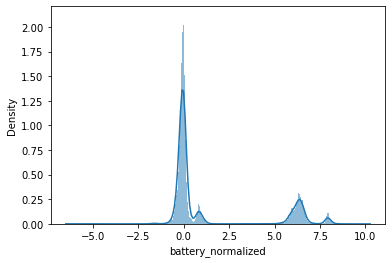

In [25]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.histplot(df[col],kde=True, stat="density", linewidth=0)

## Variables qualitatives de type object

In [26]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

id------------------ ['c93b15d6-e7ce-4e82-8d64-5ebb1a50b3a5'
 '9e77fdd9-c7ad-42f7-b703-f040b2eb5007'
 'b7cf79a0-7c2e-42fc-9955-b34dc998670b' ...
 '0a321f5c-f3b1-4972-b1c0-34d36760d0a6'
 '647669ae-4190-4015-98c0-6b7abf66f5cf'
 'da2a2a9d-c527-454d-b1e0-f4fdbd6480c8']
name---------------- ['PF-65062' 'ST-14867' 'PF-78663' '98729' 'PF-80093' '84235' 'PF-70682'
 'PF-51007' 'PF-44919' 'PF-68611' 'ALPES 03/4' 'PF-95302' 'PF-72713'
 'PF-77277' 'PF-83863' '84234' 'PF-89968' 'PF-62292' 'PF-78590' 'PF-57882'
 'PF-96736' 'PF-70130' 'PF-99436' 'PF-93448' 'PF-96735' 'PF-60705'
 'PF-84614' 'PF-79272' 'PF-82699' 'PF-89136' 'PF-95307' 'PF-57695'
 'PF-63817' 'PF-76724' 'PF-84098' 'PF-65384' 'PF-83101' 'PF-89135'
 'PF-72462' 'PF-79865' 'CLERMONT 01/2' 'PF-77172' 'PF-73671' 'PF-90471'
 'PF-58680' 'PF-89939' 'PF-89751' 'PF-60415' '65744' 'PF-77174' 'PF-75138'
 'PF-79501' 'PF-64766' 'PF-65880' 'GA2A-ARD-2F7' 'PF-79505' 'PF-80622'
 'PF-71549' 'ST-12347' 'PF-48864' 'PF-72220' 'PF-69224' 'PF-56446'
 'PF-81731'

# Clustering model ⭕👨‍👦‍👦

Pour ce modèle, je vais prendre les valeurs de la tension d'une batterie d'un camion en particuler sur un mois donné.

In [9]:
#tests de comparaison
df_pf85403=df.loc[(df.name == 'PF-65062')]
#df_pf85403=df.loc[(df.name == 'PF-78663')]
df_pf85403['dateTime']=pd.to_datetime(df_pf85403.loc[:, ('dateTime')]) # conversion de la colonne en type datetime
df_pf85403=df_pf85403[df_pf85403['dateTime'].dt.year > 2020] # on prend les données à partir de 2021
#df_pf85403=df_pf85403[(df_pf85403['dateTime'] >= '2021-03-30')&(df_pf85403['dateTime'] < '2021-04-14')]

/var/folders/7y/h89k6_2d6b3264vh1fjj6smm0000gp/T/ipykernel_1591/828127507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pf85403['dateTime']=pd.to_datetime(df_pf85403.loc[:, ('dateTime')])


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df_pf85403['id'] = encoder.fit_transform(df_pf85403['id'])

In [15]:
df_idVal=pd.DataFrame({'id': df_pf85403['id'], 'battery_normalized': df_pf85403['battery_normalized']})

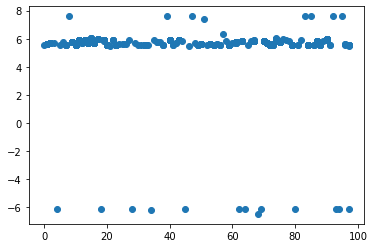

In [16]:
plt.scatter(df_idVal['id'],df_idVal['battery_normalized'])

## KMeans model

In [14]:
#df_idVal = df_idVal.drop(["cluster"], axis=1)

In [15]:
df_idVal['cluster']=""

In [16]:
df_idVal['cluster'] = df_idVal['battery_normalized'].apply(lambda x : 1 if (x>5.5)|(x<8)  else 0)

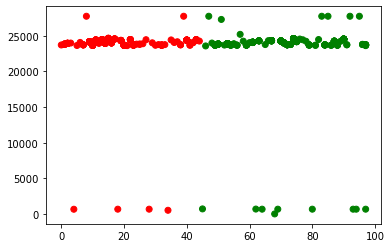

In [17]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,init = 'k-means++')
model.fit(df_idVal)
df_idVal['cluster']=model.labels_
model.predict(df_idVal)
colors = ['green','red']
plt.scatter(df_idVal['id'],rs_inverse.inverse_transform(np.array(df_idVal['battery_normalized']).reshape(-1, 1)),c=model.predict(df_idVal),cmap=matplotlib.colors.ListedColormap(colors))
#plt.scatter(df_idVal['battery_normalized'],df_idVal['cluster'],c=model.predict(df_idVal),cmap=matplotlib.colors.ListedColormap(colors))

Conclusion : Le KMeans n'est pas adapté pour notre étude.

In [18]:
inertie = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k,init = 'k-means++').fit(df_idVal)
    inertie.append(model.inertia_)

Text(0, 0.5, 'Coût inertie du modèle')

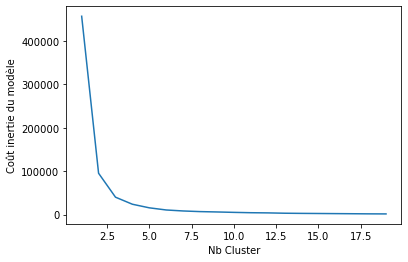

In [19]:
plt.plot(K_range,inertie)
plt.xlabel('Nb Cluster')
plt.ylabel('Coût inertie du modèle')

In [20]:
from kneed import KneeLocator

3
3


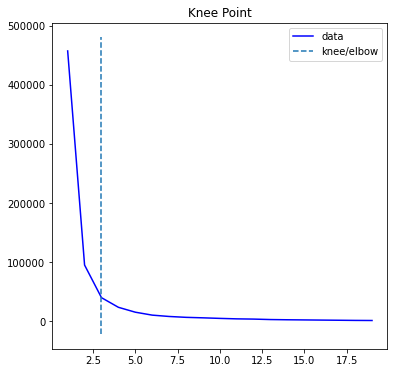

In [21]:
np.seterr(divide='ignore', invalid='ignore')#skip division by 0
kneedle = KneeLocator(K_range,inertie,curve="convex", direction="decreasing")
kneedle.plot_knee()
print(round(kneedle.knee, 1))
print(round(kneedle.elbow,1))

Il faut prendre 4 clusters.

In [22]:
hyper_params = {'n_clusters':range(2, 10)}

In [23]:
X = df_idVal[['id']]
Y = df_idVal['battery_normalized']
#X = df_idVal[['battery_normalized']]
#Y = df_idVal['cluster']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5) #2O% de la data pour test

In [25]:
model=KMeans()
#grid = GridSearchCV(model, hyper_params, scoring='accuracy', cv = 4)
grid = GridSearchCV(model, hyper_params, scoring='r2', cv = 4)
res=grid.fit(X_train, Y_train)
print(grid.best_params_)
Y_pred = grid.predict(X_test)

{'n_clusters': 9}


In [26]:
from sklearn.metrics import accuracy_score, recall_score, r2_score, v_measure_score

In [27]:
print("R2 = ", r2_score(Y_test,Y_pred))

R2 =  -4.193095338711231


In [28]:
#print("Accuracy = ", accuracy_score(Y_test,Y_pred))

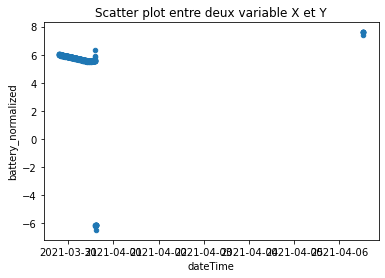

In [29]:
df_pf85403.plot.scatter(x='dateTime', y='battery_normalized', title= "Scatter plot entre deux variable X et Y")
plt.show()

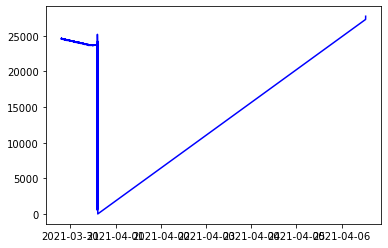

In [30]:
plt.plot(df_pf85403['dateTime'],rs_inverse.inverse_transform(np.array(df_pf85403['battery_normalized']).reshape(-1, 1)), c='blue')

## Isolation Forest model 🌲🌳🌲🌳🌲

In [31]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(contamination=0.01)
model.fit(df_idVal)

/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

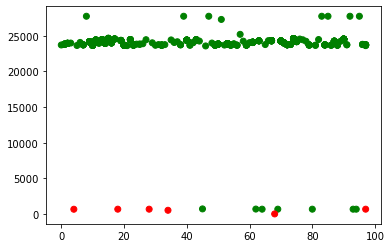

In [32]:
colors = ['red','green']
plt.scatter(df_idVal['id'],rs_inverse.inverse_transform(np.array(df_idVal['battery_normalized']).reshape(-1, 1)),c=model.predict(df_idVal),cmap=matplotlib.colors.ListedColormap(colors))

Conclusion: l'IF a l'air pas mal pour détecter les outliers.

In [33]:
outliers= model.predict(df_idVal) == -1

In [34]:
df_pf85403["outlier"] = outliers

In [35]:
df_pf85403.loc[df_pf85403.outlier == True]

,id,externalId,name,value,dateTime,battery_normalized,outlier
275058,34,212014918914853,PF-85403,510.0,2021-03-31 14:15:17+00:00,-6.239837,True
276406,4,212014918914853,PF-85403,656.0,2021-03-31 14:21:21+00:00,-6.165650,True
278389,97,212014918914853,PF-85403,665.0,2021-03-31 14:29:24+00:00,-6.161077,True
920604,28,212014918914853,PF-85403,665.0,2021-03-31 14:29:24+00:00,-6.161077,True
1011278,18,212014918914853,PF-85403,665.0,2021-03-31 14:29:24+00:00,-6.161077,True
1788739,68,212014918914853,PF-85403,0.0,2021-03-31 14:29:36+00:00,-6.498984,True


# Time series model 🕒📈

In [59]:
df_pf85403.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29093 entries, 58 to 3574094
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  29093 non-null  int64              
 1   externalId          29093 non-null  int64              
 2   name                29093 non-null  object             
 3   value               29093 non-null  float64            
 4   dateTime            29093 non-null  datetime64[ns, UTC]
 5   battery_normalized  29093 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(1)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='dateTime'>

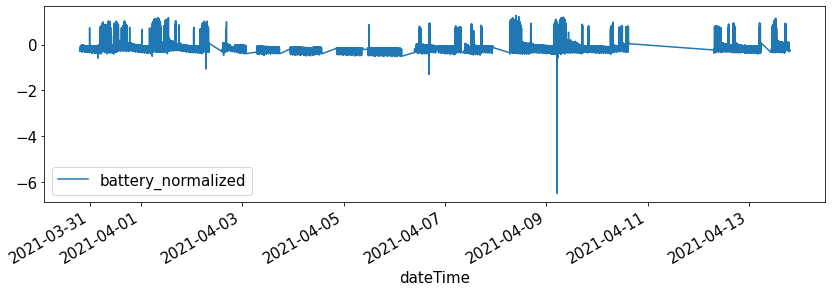

In [60]:
df_pf85403.plot(x='dateTime', y='battery_normalized', figsize=(14,4))

<AxesSubplot:xlabel='dateTime'>

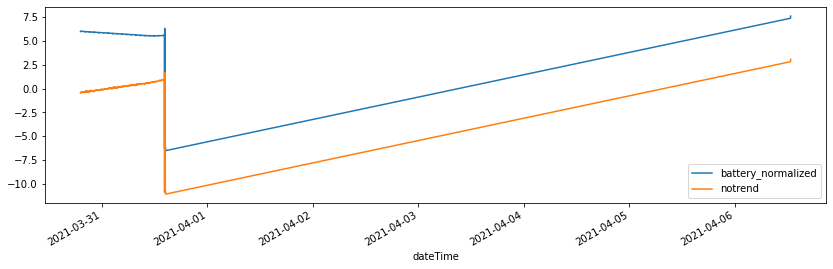

In [38]:
from statsmodels.tsa.tsatools import detrend
notrend = detrend(df_pf85403.battery_normalized)
df_pf85403["notrend"] = notrend
df_pf85403.plot(x="dateTime", y=["battery_normalized", "notrend"], figsize=(14,4))

In [39]:
from statsmodels.tsa.stattools import acf
cor = acf(df_pf85403.notrend)
cor

array([ 1.        ,  0.72323009,  0.70657089,  0.69432497,  0.50517083,
        0.48907175,  0.3889468 ,  0.28932856,  0.18985604,  0.11527444,
        0.04087426, -0.03632078, -0.01244476, -0.08777113, -0.06550811,
       -0.0357977 , -0.11162953, -0.09178928, -0.07018276, -0.04875123,
       -0.04912793, -0.02758292, -0.02786814, -0.02908089, -0.00759661,
       -0.00760725, -0.00761165, -0.00771161])

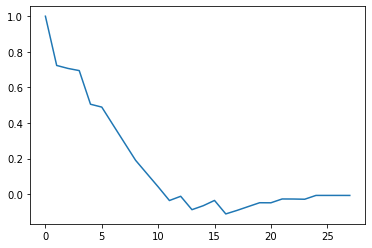

In [40]:
plt.plot(cor)

La fonction d'autocorrélation montre une chute rapide de la corrélation en fonction du tps => série stationnaire?

In [41]:
from statsmodels.api import OLS
from statsmodels.graphics.regressionplots import abline_plot

In [42]:
y = df_pf85403.battery_normalized
X = np.ones((len(y), 2))#axe x des entiers
X[:,1] = np.arange(0,len(y))
reg = OLS(y,X)
results = reg.fit()
results.params

const    6.430910
x1      -0.003467
dtype: float64

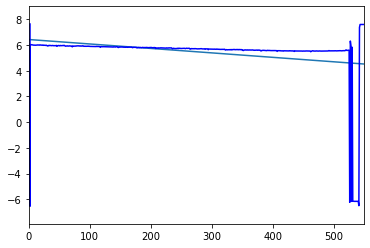

In [43]:
fig = abline_plot(model_results=results)
ax = fig.axes[0]
ax.plot(X, y, 'b')
ax.margins(.1)

## Visualisation de la time series

In [12]:
ts_df = df_pf85403.set_index('dateTime') # dataframe indexée par la colonne dateTime

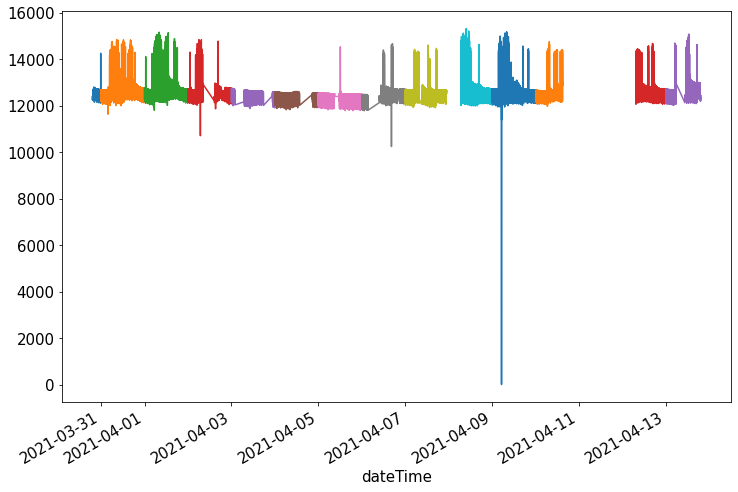

In [71]:
ts_df.loc['2021','value'].resample('D').plot()
plt.show()

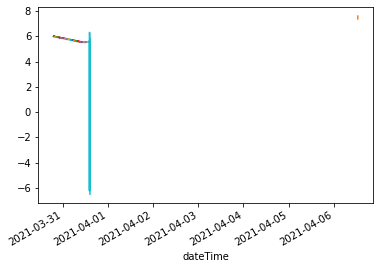

In [46]:
ts_df.loc['2021','battery_normalized'].resample('H').plot()
plt.show()

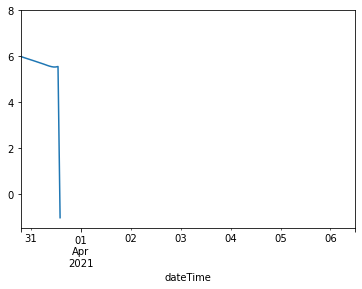

In [47]:
ts_df.loc['2021','battery_normalized'].resample('H').mean().plot()
plt.show()

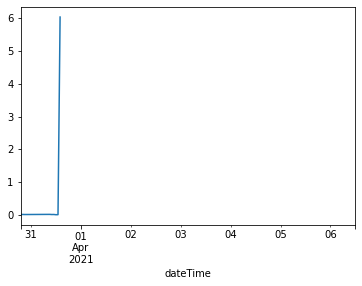

In [48]:
ts_df.loc['2021','battery_normalized'].resample('H').std().plot()
plt.show()

Batterie très volatile le 31 mars à minuit.

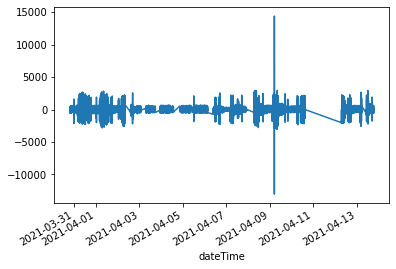

In [31]:
ts_df['value']['2021'].diff().plot()
plt.show()

Beacoup de variations extrêmes.

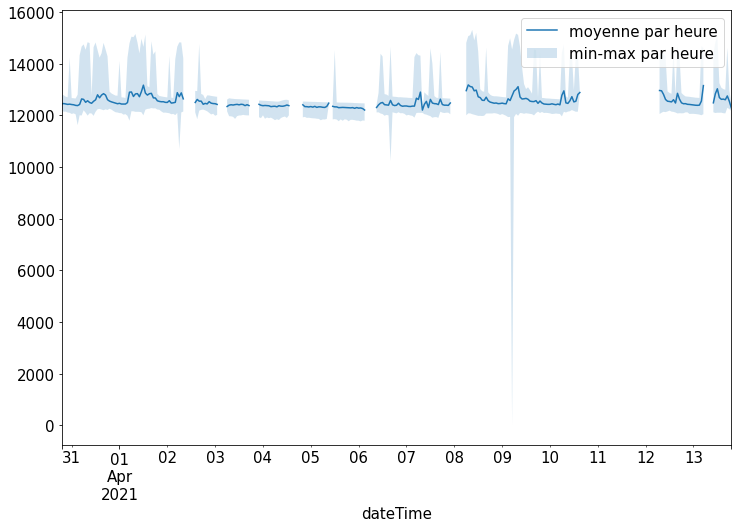

In [64]:
describe_ts = ts_df['value'].resample('H').agg(['mean','std','min','max'])

plt.figure(figsize=(12,8))
describe_ts['mean']['2021'].plot(label='moyenne par heure')
plt.fill_between(describe_ts.index,describe_ts['max'],describe_ts['min'], alpha=0.2, label='min-max par heure')

plt.legend()
plt.show()

In [65]:
ts_df.groupby('dateTime').sum()['battery_normalized'].sort_values()

dateTime
2021-04-09 05:07:26+00:00   -6.498984
2021-04-06 16:20:38+00:00   -1.297764
2021-04-02 06:50:10+00:00   -1.060976
2021-04-09 05:10:49+00:00   -0.717988
2021-04-10 06:17:09+00:00   -0.691057
                               ...   
2021-04-09 08:07:47+00:00    1.515752
2021-04-09 08:09:47+00:00    1.519309
2021-04-09 07:09:23+00:00    1.519817
2021-04-09 08:13:49+00:00    1.568598
2021-04-09 08:05:45+00:00    1.628049
Name: battery_normalized, Length: 28839, dtype: float64

## Régulariser la série temporelle

In [13]:
serie = ts_df[['value']].copy()

In [14]:
#res = serie.resample('s').interpolate().resample('15T').asfreq().dropna()
resampled_ts = serie.resample('1H').mean().interpolate()
print(resampled_ts)

                                  value
dateTime                               
2021-03-30 19:00:00+00:00  12447.478261
2021-03-30 20:00:00+00:00  12462.571429
2021-03-30 21:00:00+00:00  12445.770115
2021-03-30 22:00:00+00:00  12430.008850
2021-03-30 23:00:00+00:00  12438.792453
...                                 ...
2021-04-13 15:00:00+00:00  12634.674603
2021-04-13 16:00:00+00:00  12609.728000
2021-04-13 17:00:00+00:00  12757.280000
2021-04-13 18:00:00+00:00  12553.041667
2021-04-13 19:00:00+00:00  12299.000000

[337 rows x 1 columns]


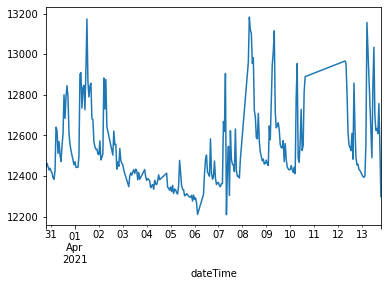

In [15]:
resampled_ts.loc['2021','value'].plot()
plt.show()

## STL decompositon

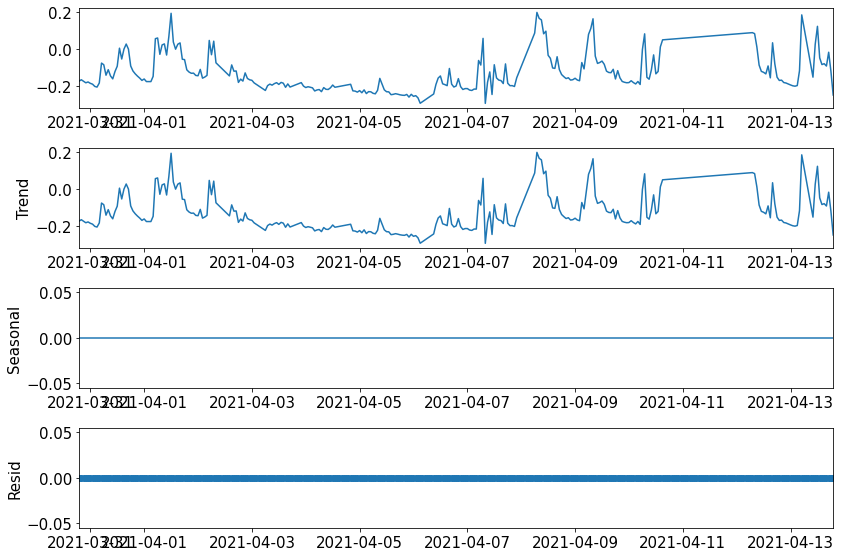

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)
#result = seasonal_decompose(serie,model='additive',period=1)
result = seasonal_decompose(resampled_ts,model='additive',period=1)
fig = result.plot()

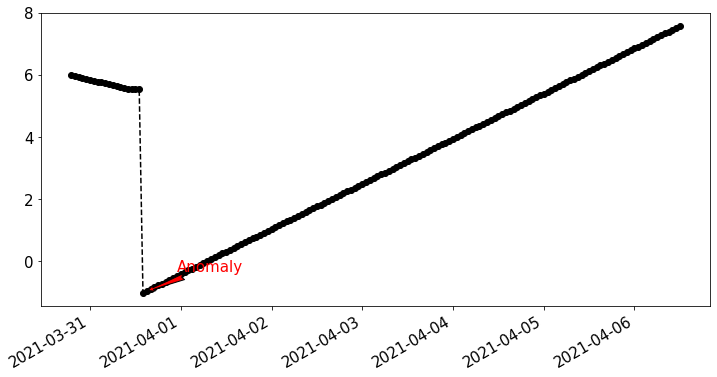

In [55]:
import matplotlib.dates as mdates
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
fig, ax = plt.subplots()
x = result.trend.index
y = result.trend.values
ax.plot_date(x, y, color='black',linestyle='--')
#ax.annotate('Anomaly', (mdates.date2num(x[35]), y[35]), xytext=(30, 20),textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))
ax.annotate('Anomaly', (mdates.date2num(x[20]), y[20]), xytext=(30, 20),textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))
fig.autofmt_xdate()
plt.show()

In [56]:
print((mdates.date2num(x[20]), y[20]))
#print((mdates.date2num(x[433]), y[433]))

(18717.625, -0.9513833592532575)


## Isolation Forest et time series 🌲🌳🕒📈

In [16]:
testdf=pd.DataFrame({'dateTime': resampled_ts.index, 'battery_normalized': resampled_ts['battery_normalized']})

In [17]:
outliers_fraction = float(.01)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(np.array(testdf['battery_normalized']).reshape(-1, 1)) # entraînement de l'isolation forest

IsolationForest(contamination=0.01)

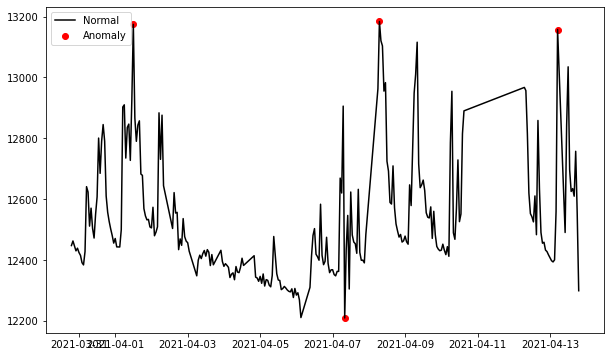

In [18]:
# prédiction des anomalies
testdf['anomaly'] = model.predict(np.array(testdf['battery_normalized']).reshape(-1, 1))
# visualisation
fig, ax = plt.subplots(figsize=(10,6))
a = testdf.loc[testdf['anomaly'] == -1, ['battery_normalized']] #anomaly
ax.plot(testdf.index, rs_inverse.inverse_transform(np.array(testdf['battery_normalized']).reshape(-1, 1)), color='black', label = 'Normal') #dénormalise la valeur de la batterie sur le graphique
ax.scatter(a.index,rs_inverse.inverse_transform(np.array(a['battery_normalized']).reshape(-1, 1)), color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [19]:
print(rs_inverse.inverse_transform(np.array(a).reshape(-1, 1)))

[[13174.53793103]
 [12209.44444444]
 [13183.95774648]
 [13157.5106383 ]]


Conclusion : le TSIF me semble bien.

## Test ADTK

In [62]:
df_tmp = df_pf85403[(df_pf85403.dateTime >= "2021-03-30 10:00:00+00:00")].copy()

In [63]:
ts_tmp = df_tmp.set_index('dateTime')

In [64]:
threshold_val = ThresholdAD(high=6.1, low=5.5)
#anomalies_thresh = threshold_val.detect(ts_tmp['battery_normalized'])
anomalies_thresh = threshold_val.detect(resampled_ts['battery_normalized'])
anomalies_thresh.value_counts()

True     133
False     29
Name: battery_normalized, dtype: int64

[<AxesSubplot:>]

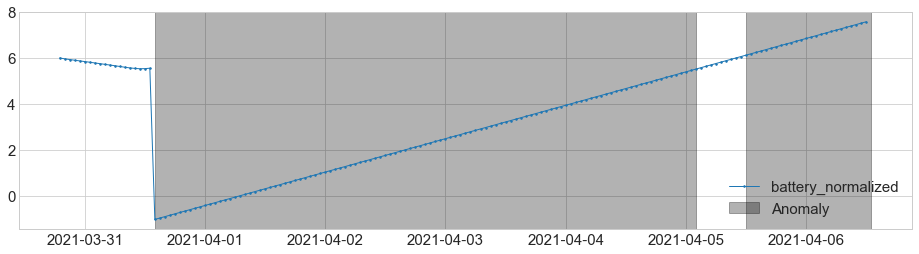

In [65]:
from adtk.visualization import plot
#plot(ts_tmp, anomaly=anomalies_thresh, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='black')
plot(resampled_ts, anomaly=anomalies_thresh, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='black')

Conclusion : Le modèle thresholdAD ne trouve pas de seuil seul.

## KMeans time series

/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 337 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


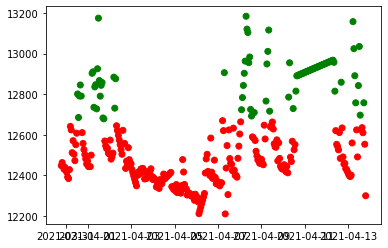

In [40]:
#km = TimeSeriesKMeans(n_cluster s=2, metric="euclidean", init='k-means++').fit(serie)
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", init='k-means++').fit(resampled_ts)
colors = ['green','red']
plt.scatter(resampled_ts.index,resampled_ts['value'],c=km.predict(np.array(resampled_ts['value']).reshape(-1,1)),cmap=matplotlib.colors.ListedColormap(colors))

In [41]:
rs_inverse.inverse_transform(np.array(km.cluster_centers_).reshape(-1, 1))

array([[25383283.87916781],
       [24511093.01639827]])

In [42]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = resampled_ts.index.values
cluster_map['value'] = rs_inverse.inverse_transform(np.array(resampled_ts.values).reshape(-1, 1))
cluster_map['cluster'] = km.labels_

In [43]:
cluster_map[cluster_map.cluster == 1] # affiche la liste des points anormales

,data_index,value,cluster
0,2021-03-30 19:00:00,2.450943e+07,1
1,2021-03-30 20:00:00,2.453913e+07,1
2,2021-03-30 21:00:00,2.450607e+07,1
3,2021-03-30 22:00:00,2.447505e+07,1
4,2021-03-30 23:00:00,2.449233e+07,1
...,...,...,...
331,2021-04-13 14:00:00,2.485936e+07,1
332,2021-04-13 15:00:00,2.487783e+07,1
333,2021-04-13 16:00:00,2.482873e+07,1
335,2021-04-13 18:00:00,2.471718e+07,1


In [24]:
centroids = km.cluster_centers_ 
average = [sum(x)/len(x) for x in zip(*centroids)]
print("Seuil du KMeans = ",rs_inverse.inverse_transform(average))

Seuil du KMeans =  [[12668.32147585]]


Conclsusion : le TSKM a l'air de détecter les outliers.

# Modèle linéaire ARIMA 📉

Avant de créer ce modèle, vérifions si la série est stationnaire.

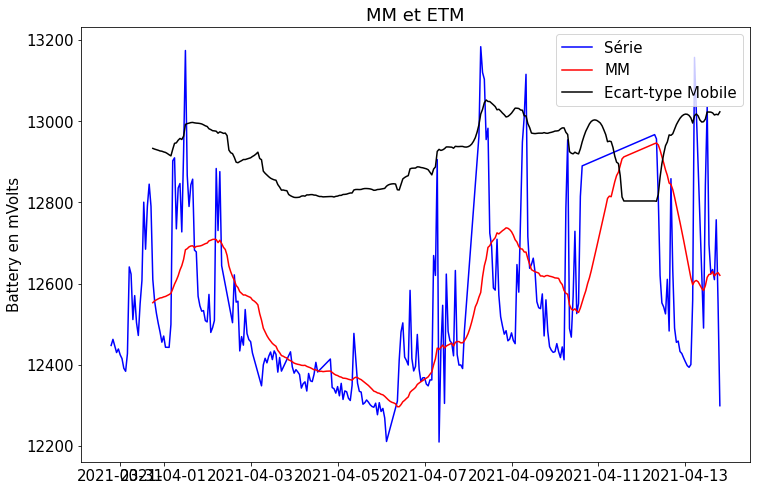

In [97]:
rolling_mean = resampled_ts.rolling(window = 24).mean() #heure par heure => 1 moyenne/jour
rolling_std = resampled_ts.rolling(window = 24).std()
plt.plot(resampled_ts.index,rs_inverse.inverse_transform(np.array(resampled_ts).reshape(-1, 1)),color='blue',label='Série')
plt.plot(resampled_ts.index,rs_inverse.inverse_transform(np.array(rolling_mean).reshape(-1, 1)),color='red',label='MM')
plt.plot(resampled_ts.index,rs_inverse.inverse_transform(np.array(rolling_std).reshape(-1, 1)),color='black',label='Ecart-type Mobile')
plt.ylabel('Battery en mVolts')
plt.legend(loc='best')
plt.title('MM et ETM')
plt.show()

D'après la forme de la série, elle ne converge pas vers une moyenne précise. De plus la MM augemente avec le temps => série pas stationnaire

In [98]:
from statsmodels.tsa.stattools import adfuller

Test de Dickey-Fuller augmenté (ADF) : une série est stationnaire si p-value < 5% et les valeurs critqiues ~= stats ADF

In [99]:
result = adfuller(resampled_ts)

print('Statistiques ADF = {}'.format(result[0]))
print('p-value = {}'.format(result[1]))
print('Valeurs critiques :')
for key,val in result[4].items():
    print('\t{} : {}'.format(key, val))

Statistiques ADF = -3.6759927396715715
p-value = 0.004463793734408806
Valeurs critiques :
	1% : -3.450081345901191
	5% : -2.870232621465807
	10% : -2.571401168202517


p-value > 5% => série non stationnaire

Pour construire le modèle, il faut trouver les ordres optimaux (p,d,q).

In [100]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

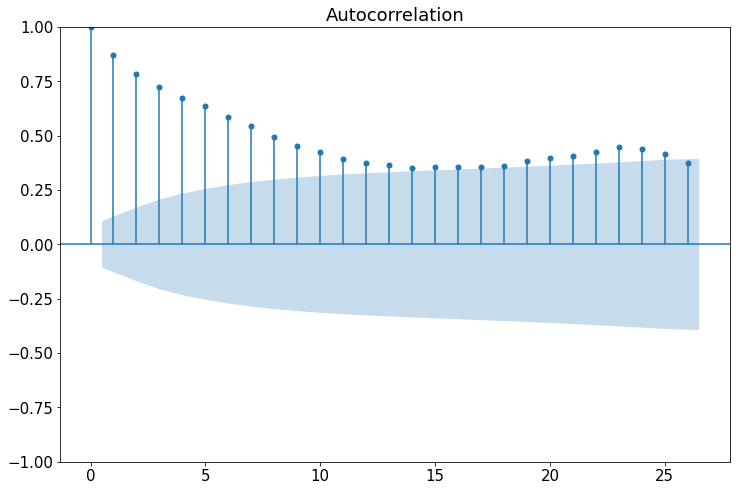

In [101]:
plot_acf(resampled_ts)
plt.show()

On prend q = 26

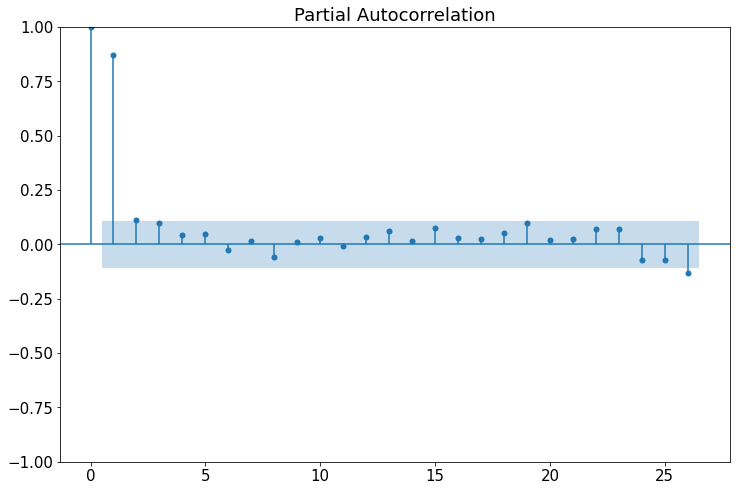

In [102]:
plot_pacf(resampled_ts,method='ywm')
plt.show()

On prend p = 3

In [103]:
def get_stationarity(ts) :
    rolling_mean = ts.rolling(window = 24).mean() #heure par heure => 1 moyenne/jour
    rolling_std = ts.rolling(window = 24).std()
    
    plt.plot(ts.index,rs_inverse.inverse_transform(np.array(ts).reshape(-1, 1)),color='blue',label='Série')
    plt.plot(ts.index,rs_inverse.inverse_transform(np.array(rolling_mean).reshape(-1, 1)),color='red',label='MM')
    plt.plot(ts.index,rs_inverse.inverse_transform(np.array(rolling_std).reshape(-1, 1)),color='black',label='Ecart-type Mobile')

    plt.ylabel('Battery en mVolts')
    plt.legend(loc='best')
    plt.title('MM et ETM')
    plt.show(block=False)
    
    result = adfuller(ts)
    print('Statistiques ADF = {}'.format(result[0]))
    print('p-value = {}'.format(result[1]))
    print('Valeurs critiques :')
    for key,val in result[4].items():
        print('\t{} : {}'.format(key, val))

In [104]:
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

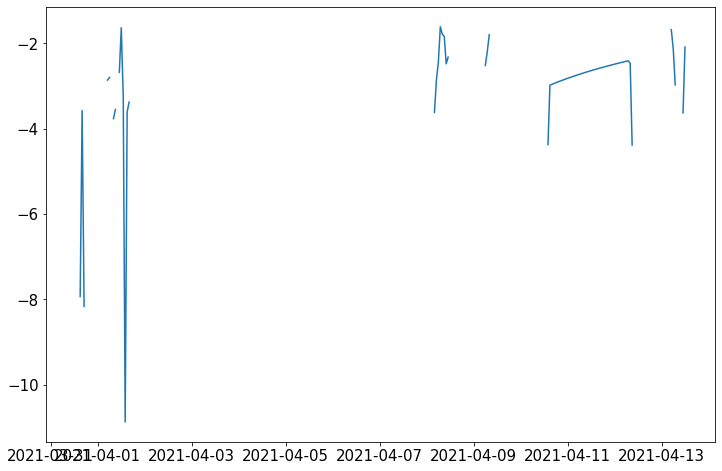

In [105]:
ts_log = np.log(resampled_ts) #réduire taux d'augementation de la M
plt.plot(ts_log)

### Soustraction de la moyenne

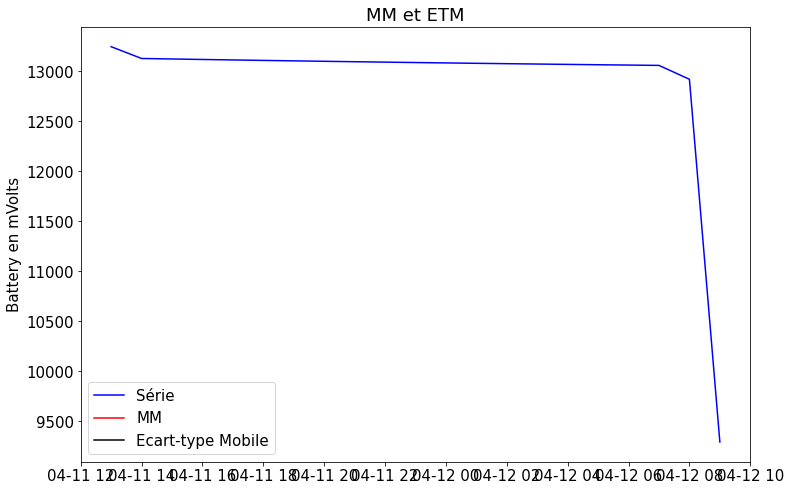

Statistiques ADF = 3.2386752486962016
p-value = 1.0
Valeurs critiques :
	1% : -4.137829282407408
	5% : -3.1549724074074077
	10% : -2.7144769444444443


In [106]:
rolling_mean = ts_log.rolling(window = 24).mean()
ts_log_minus_mean = ts_log - rolling_mean
get_stationarity(ts_log_minus_mean.dropna())

Graphiquement : les courbes MM et ETM sont devenues plus horizontaux
Statistiquement : p-value < 5% mais la stat ADF s'est éloignée des valeurs critiques.

### Décroissance exponentielle

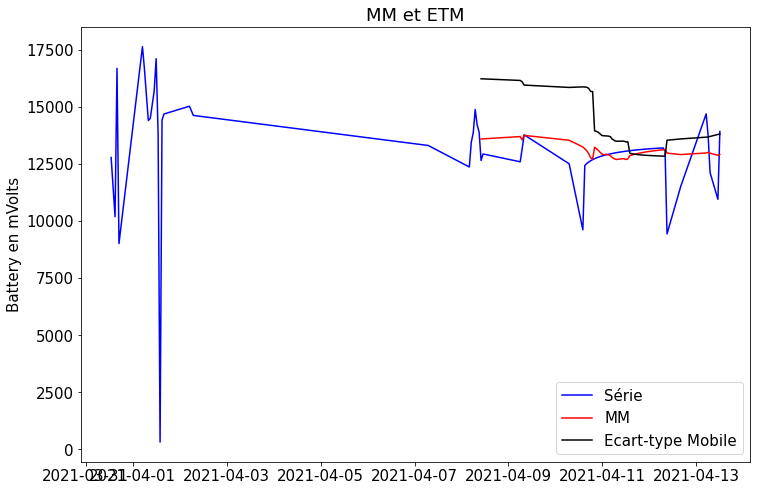

Statistiques ADF = -5.996406254810562
p-value = 1.6974910267649466e-07
Valeurs critiques :
	1% : -3.5194805351545413
	5% : -2.9003945086747343
	10% : -2.5874984279778395


In [107]:
rolling_mean_exp_day = ts_log.ewm(halflife=24, min_periods=0, adjust=True).mean()
ts_log_exp_day = ts_log - rolling_mean_exp_day
get_stationarity(ts_log_exp_day.dropna())

C'est mieux que la soustraction de la MM.
Graphiquement : les courbes MM et ETM sont quasiment horizontaux
Statistiquement : p-value < 5% et la stat ADF s'est rapprochée des valeurs critiques.

### Différenciation d'ordre 1

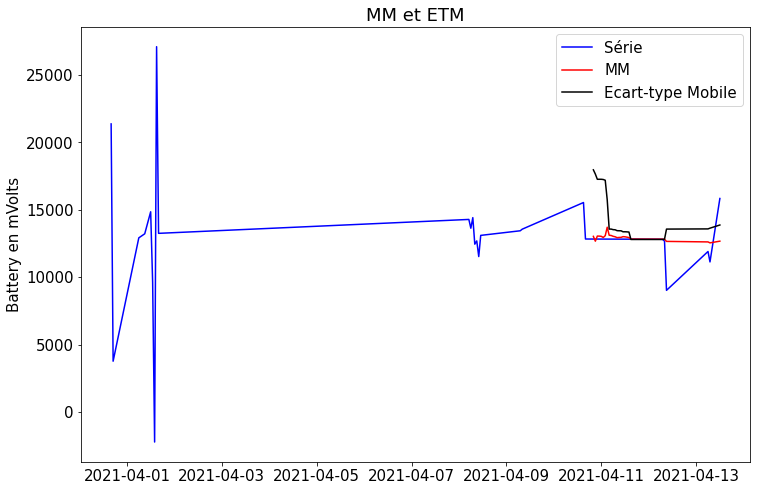

Statistiques ADF = -0.37657875705617355
p-value = 0.9139364543959585
Valeurs critiques :
	1% : -3.560242358792829
	5% : -2.9178502070837
	10% : -2.5967964150943397


In [108]:
ts_log_shift = ts_log - ts_log.shift()
get_stationarity(ts_log_shift.dropna())

p-value très petite.
Les cours MM et ETM étant plus horizontales => série est plus stationnaire.

In [109]:
import statsmodels.api as sm
import statsmodels as sm2

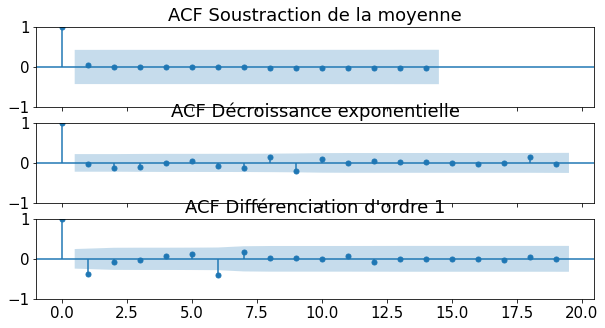

In [110]:
fig, ax = plt.subplots(3,1,figsize=(10,5),sharex=True)
sm.graphics.tsa.plot_acf(ts_log_minus_mean.dropna(), ax=ax[0], title = "ACF Soustraction de la moyenne")
sm.graphics.tsa.plot_acf(ts_log_exp_day.dropna(), ax=ax[1], title = "ACF Décroissance exponentielle")
sm.graphics.tsa.plot_acf(ts_log_shift.dropna(), ax=ax[2], title = "ACF Différenciation d\'ordre 1")
plt.show()

La courbe de l'ACF avec une différenciation d'ordre 1 atteint zéro plus rapidement. On peut prendre d=1.

/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


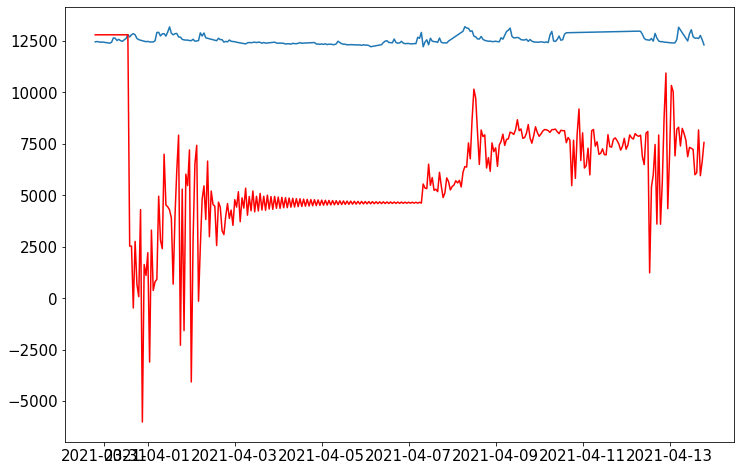

In [111]:
decomposition = seasonal_decompose(resampled_ts)
model = sm.tsa.arima.ARIMA(ts_log, order=(3,1,26))
results = model.fit()
"""plt.plot(resampled_ts)
plt.plot(results.fittedvalues , color='red')"""
plt.plot(resampled_ts.index,rs_inverse.inverse_transform(np.array(resampled_ts).reshape(-1, 1)))
plt.plot(resampled_ts.index,rs_inverse.inverse_transform(np.array(results.fittedvalues).reshape(-1, 1)) , color='red')

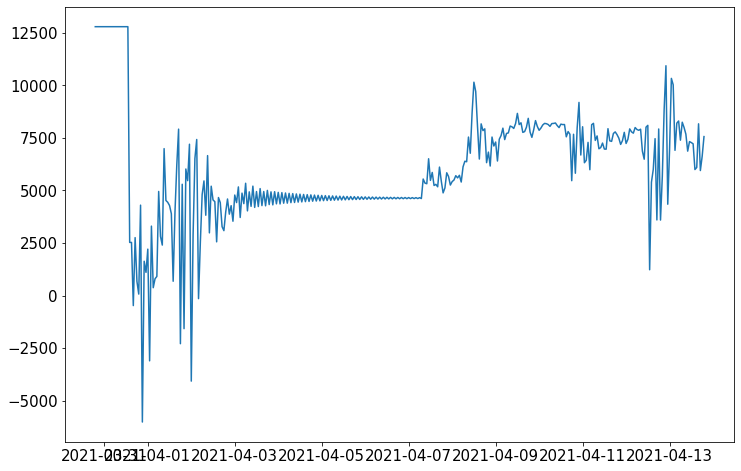

In [112]:
fig = results.predict() 
plt.plot(resampled_ts.index,rs_inverse.inverse_transform(np.array(fig).reshape(-1, 1)))

In [86]:
from statsmodels.tsa.arima_model import ARIMA

/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


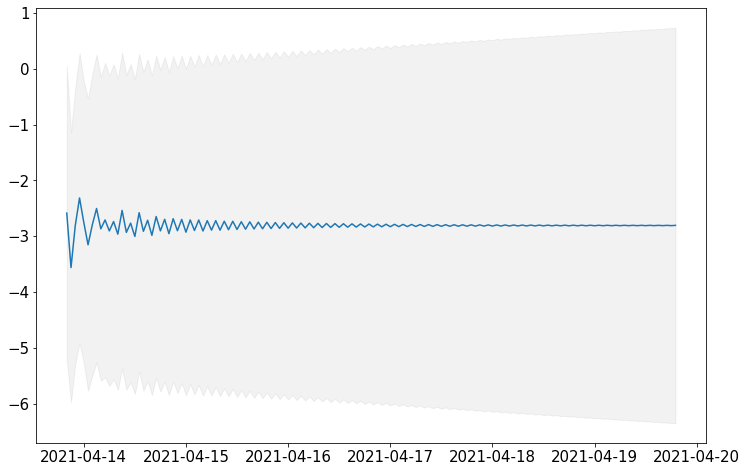

In [113]:
decomposition = seasonal_decompose(resampled_ts)
model = sm.tsa.arima.ARIMA(ts_log, order=(3,1,26))  # création du modèle
results = model.fit()
forecast = results.get_forecast(144)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)
lower_series = pd.Series(yhat_conf_int['lower battery_normalized'], index=yhat_conf_int.index)
upper_series = pd.Series(yhat_conf_int['upper battery_normalized'], index=yhat_conf_int.index)
plt.plot(yhat.index,yhat,label='forecast')
plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=0.05)

In [114]:
train = resampled_ts.loc[resampled_ts.index <= '2021-03-31 12:00:00+00:00']
test = resampled_ts.loc[resampled_ts.index > '2021-03-31 12:00:00+00:00']
print(train.shape)
print(test.shape)

(18, 1)
(319, 1)


/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           lower battery_normalized  upper battery_normalized
2021-03-31 13:00:00+00:00                 -0.173888                 -0.077194


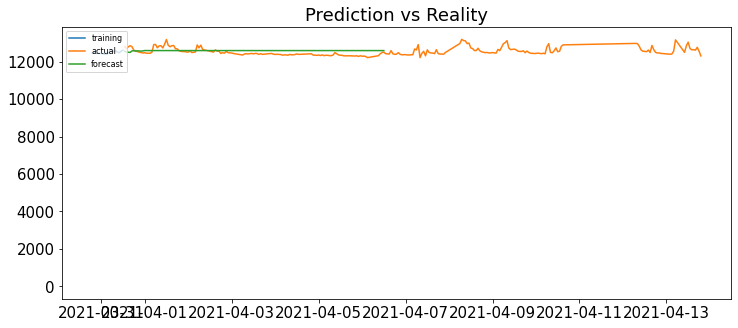

In [115]:
model = sm.tsa.arima.ARIMA(train, order=(3,1,12))
fitted = model.fit()
result = fitted.get_forecast()

# Forecast
fc = fitted.forecast(144, alpha=0.05) # prédiction avec 95% de confiance
se = result.se_mean # erreur quadratique

# transformation en pandas.Series() ppour construire l'intervalle de confiance
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf['lower battery_normalized'], index=test.index)
upper_series = pd.Series(conf['upper battery_normalized'], index=test.index)

plt.figure(figsize=(12,5))
plt.plot(train.index,rs_inverse.inverse_transform(np.array(train).reshape(-1, 1)), label='training')
plt.plot(test.index,rs_inverse.inverse_transform(np.array(test).reshape(-1, 1)), label='actual')
plt.plot(fc_series.index,rs_inverse.inverse_transform(np.array(fc_series).reshape(-1, 1)), label='forecast')
#plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=0.15)#marche pas
plt.title('Prediction vs Reality')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Conclusion : les valeurs prédites par ARIMA sont assez proches de la réalité.

## Prédiction avec Prophet

In [122]:
from prophet import Prophet

In [123]:
df_model= resampled_ts.reset_index().rename(columns={'dateTime':'ds', 'value':'y'})
df_model['ds']=df_model['ds'].dt.tz_localize(None)

In [124]:
# Création du modèle prophet
prophet_model = Prophet(yearly_seasonality=True,weekly_seasonality=True)
prophet_model.fit(df_model)

/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.11544


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1379.64    0.00136944       1155.38      0.8188      0.8188      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1382.99   0.000230957       147.322      0.9202      0.9202      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1384.94    0.00108344       391.553           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1385.74   0.000166387       114.395        5.36       0.536      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1386.81    0.00140171       149.938           1           1      596   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


  1387.58    4.6562e-05       94.0413      0.6242      0.6242      716   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     698       1387.75   1.68921e-05       313.083   4.324e-08       0.001      882  LS failed, Hessian reset 
     699       1387.75   1.05924e-05       244.317           1           1      883   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     792       1387.85   1.21918e-05       85.4258   1.509e-07       0.001     1028  LS failed, Hessian reset 
     799       1387.85   1.21819e-06       74.8627      0.7024      0.7024     1037   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     842       1387.86   1.70184e-07        66.557      0.6378      0.6378     1096   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


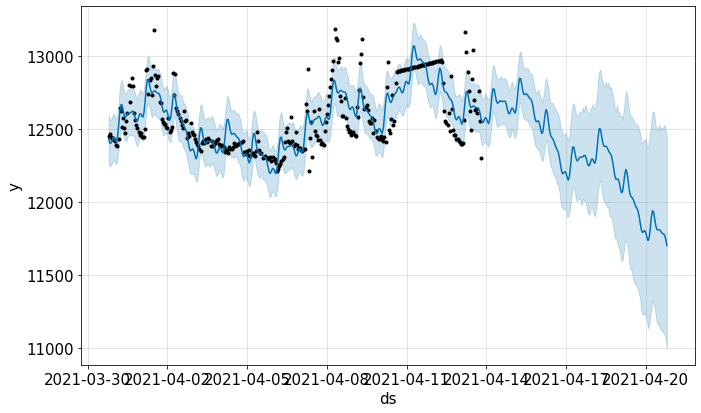

In [125]:
period_in_hours = 24*7 # Heure * Nb de jours à prédire. On fait une prédiction sur la semaine d'après
future = prophet_model.make_future_dataframe(periods=period_in_hours, freq='H')
forecast = prophet_model.predict(df=future)
fig1=prophet_model.plot(forecast)

/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


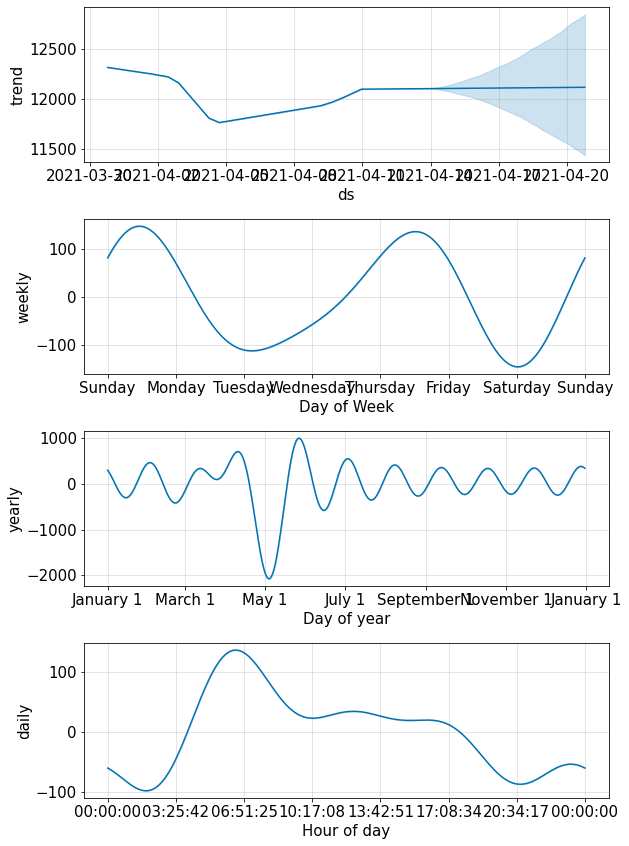

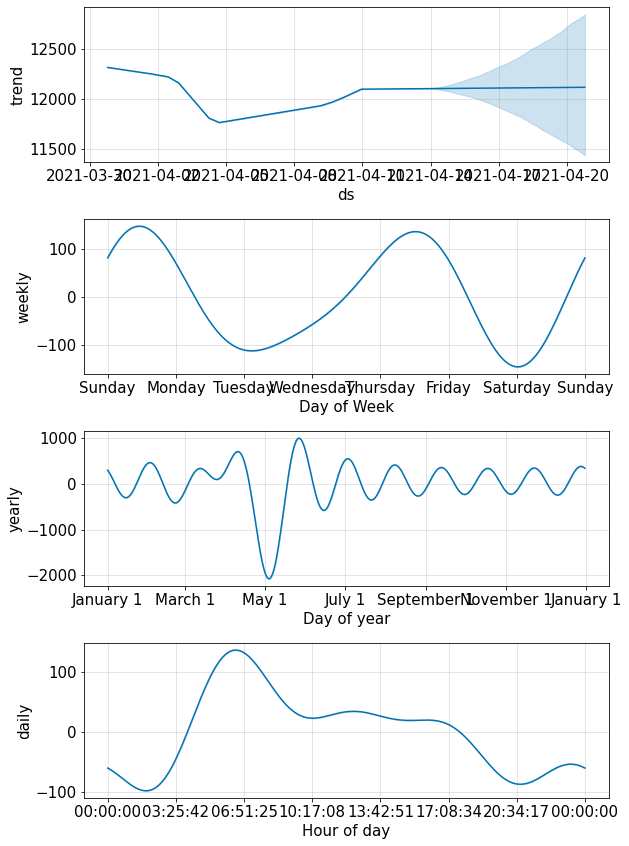

In [126]:
prophet_model.plot_components(forecast)

In [127]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_model, initial='2 days', period='4 days', horizon = '4 days')

INFO:prophet:Making 3 forecasts with cutoffs between 2021-04-01 19:00:00 and 2021-04-09 19:00:00
  0%|                                                     | 0/3 [00:00<?, ?it/s]/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -104.301
Iteration  1. Log joint probability =    62.9945. Improved by 167.296.
Iteration  2. Log joint probability =     165.21. Improved by 102.215.
Iteration  3. Log joint probability =    201.598. Improved by 36.3879.
Iteration  4. Log joint probability =    215.888. Improved by 14.2904.
Iteration  5. Log joint probability =    228.136. Improved by 12.2477.
Iteration  6. Log joint probability =    233.937. Improved by 5.80169.
Iteration  7. Log joint probability =    234.559. Improved by 0.621726.
Iteration  8. Log joint probability =    234.614. Improved by 0.0546119.
Iteration  9. Log joint probability =    234.722. Improved by 0.108412.
Iteration 10. Log joint probability =    234.821. Improved by 0.0991602.
Iteration 11. Log joint probability =    234.847. Improved by 0.0256782.
Iteration 12. Log joint probability =    234.955. Improved by 0.10742.
Iteration 13. Log joint probability =     234.98. Improved by 0.0259299.
Iteration 14. Log joint p

/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 33%|███████████████                              | 1/3 [00:08<00:16,  8.07s/it]/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/arkeup-ext/opt/anaconda3/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is de

ation 28. Log joint probability =    235.339. Improved by 0.00043314.
Iteration 29. Log joint probability =    235.341. Improved by 0.00247291.
Iteration 30. Log joint probability =    235.342. Improved by 0.00093884.
Iteration 31. Log joint probability =    235.343. Improved by 0.00121711.
Iteration 32. Log joint probability =    235.344. Improved by 0.000568104.
Iteration 33. Log joint probability =    235.344. Improved by 0.000109243.
Iteration 34. Log joint probability =    235.344. Improved by 0.000311132.
Iteration 35. Log joint probability =    235.344. Improved by 8.27388e-05.
Iteration 36. Log joint probability =    235.345. Improved by 0.000159213.
Iteration 37. Log joint probability =    235.345. Improved by 8.31634e-06.
Iteration 38. Log joint probability =    235.345. Improved by 7.67343e-05.
Iteration 39. Log joint probability =    235.345. Improved by 1.35437e-05.
Iteration 40. Log joint probability =    235.345. Improved by 7.28746e-06.
Iteration 41. Log joint probabili

100%|█████████████████████████████████████████████| 3/3 [00:18<00:00,  6.22s/it]


In [128]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-04-01 20:00:00,12520.902977,12444.807645,12607.492828,12545.112903,2021-04-01 19:00:00
1,2021-04-01 21:00:00,12594.118997,12510.891253,12675.878058,12531.958678,2021-04-01 19:00:00
2,2021-04-01 22:00:00,12795.636564,12715.091485,12875.617399,12533.412281,2021-04-01 19:00:00
3,2021-04-01 23:00:00,13102.515638,13022.894590,13189.102504,12508.628319,2021-04-01 19:00:00
4,2021-04-02 00:00:00,13496.495205,13411.756781,13575.666133,12505.421053,2021-04-01 19:00:00


In [129]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 10:00:00,2.433349e+06,1559.919487,725.554200,0.057634,0.011355,0.051192,0.416667
1,0 days 11:00:00,4.319674e+06,2078.382493,987.384730,0.078192,0.012399,0.067226,0.380952
2,0 days 12:00:00,7.166020e+06,2676.942256,1310.105077,0.103232,0.012759,0.085914,0.333333
3,0 days 13:00:00,1.163123e+07,3410.458185,1696.101313,0.133750,0.013177,0.106760,0.333333
4,0 days 14:00:00,1.818114e+07,4263.934574,2154.252443,0.170034,0.013032,0.129703,0.333333


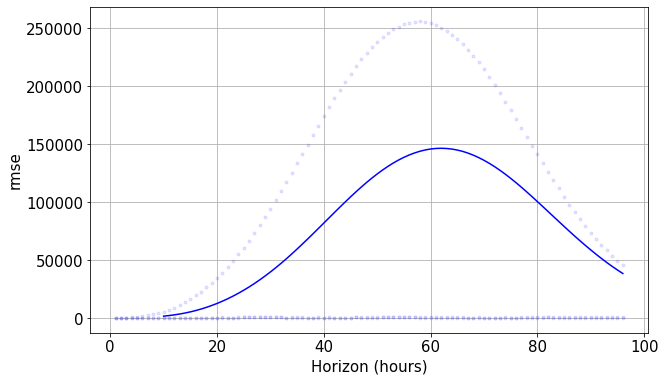

In [130]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [131]:
df_compare = pd.concat([df_model.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]],axis=1)
df_compare

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2021-03-30 19:00:00,12447.478261,12431.317572,12269.156071,12594.543217
2021-03-30 20:00:00,12462.571429,12403.305077,12241.577668,12554.057519
2021-03-30 21:00:00,12445.770115,12400.124097,12246.800819,12562.584502
2021-03-30 22:00:00,12430.008850,12420.057179,12263.365288,12580.805484
2021-03-30 23:00:00,12438.792453,12440.494292,12279.698963,12599.847865
...,...,...,...,...
2021-04-20 15:00:00,NaN,11784.152482,11112.593674,12508.356519
2021-04-20 16:00:00,NaN,11780.604690,11108.490801,12512.082014
2021-04-20 17:00:00,NaN,11771.127527,11091.040257,12525.635128


In [132]:
df_compare['error'] = df_compare['y']- df_compare['yhat'] #error components epsilon

In [133]:
df_compare['uncertainty'] = df_compare['yhat_upper']- df_compare['yhat_lower'] #on calcule l'incertitude 

In [134]:
df_compare['outlier'] = df_compare.apply(lambda x : 'Yes' if(np.abs(x['error'])>1.5*x['uncertainty']) else 'No', axis=1)

In [135]:
df_compare['value'] = rs_inverse.inverse_transform(np.array(df_compare['y']).reshape(-1, 1))

In [136]:
df_compare

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,outlier,value
ds,,,,,,,,
2021-03-30 19:00:00,12447.478261,12431.317572,12269.156071,12594.543217,16.160689,325.387147,No,2.450943e+07
2021-03-30 20:00:00,12462.571429,12403.305077,12241.577668,12554.057519,59.266352,312.479851,No,2.453913e+07
2021-03-30 21:00:00,12445.770115,12400.124097,12246.800819,12562.584502,45.646018,315.783683,No,2.450607e+07
2021-03-30 22:00:00,12430.008850,12420.057179,12263.365288,12580.805484,9.951671,317.440196,No,2.447505e+07
2021-03-30 23:00:00,12438.792453,12440.494292,12279.698963,12599.847865,-1.701839,320.148902,No,2.449233e+07
...,...,...,...,...,...,...,...,...
2021-04-20 15:00:00,NaN,11784.152482,11112.593674,12508.356519,NaN,1395.762845,No,NaN
2021-04-20 16:00:00,NaN,11780.604690,11108.490801,12512.082014,NaN,1403.591213,No,NaN
2021-04-20 17:00:00,NaN,11771.127527,11091.040257,12525.635128,NaN,1434.594871,No,NaN


In [137]:
rs_inverse.inverse_transform(np.array(df_compare['y']).reshape(-1, 1))

array([[24509427.2173913 ],
       [24539130.57142857],
       [24506065.58620689],
       [24475047.4159292 ],
       [24492333.54716981],
       [24463955.52727273],
       [24445665.36842106],
       [24398715.33333334],
       [24384192.22222222],
       [24470536.4       ],
       [24890424.86567164],
       [24855469.9389313 ],
       [24635046.8057554 ],
       [24751279.3986014 ],
       [24620460.89051095],
       [24557965.04477612],
       [24712312.375     ],
       [24824119.375     ],
       [25204595.71428572],
       [24976491.53846154],
       [25184901.65714286],
       [25291975.34351145],
       [25184616.10218978],
       [24829787.89473684],
       [24724672.26865672],
       [24664868.80991735],
       [24616804.09523809],
       [24574594.4       ],
       [24525240.59459459],
       [24555079.72972973],
       [24500792.90909091],
       [24500759.18032787],
       [24500193.35877863],
       [24611117.2       ],
       [25405302.22377623],
       [25419655.841

In [138]:
import plotly.express as px

ty =    235.345. Improved by 3.58849e-05.
Iteration 42. Log joint probability =    235.345. Improved by 2.21839e-06.
Iteration 43. Log joint probability =    235.345. Improved by 4.25418e-06.
Iteration 44. Log joint probability =    235.345. Improved by 2.09817e-05.
Iteration 45. Log joint probability =    235.345. Improved by 1.36923e-06.
Iteration 46. Log joint probability =    235.345. Improved by 2.00329e-07.
Iteration 47. Log joint probability =    235.345. Improved by 1.31667e-05.
Iteration 48. Log joint probability =    235.345. Improved by 2.91115e-06.
Iteration 49. Log joint probability =    235.345. Improved by 1.20431e-06.
Iteration 50. Log joint probability =    235.345. Improved by 2.32089e-06.
Iteration 51. Log joint probability =    235.345. Improved by 3.10444e-07.
Iteration 52. Log joint probability =    235.345. Improved by 4.56545e-07.
Iteration 53. Log joint probability =    235.345. Improved by 1.40276e-06.
Iteration 54. Log joint probability =    235.345. Improved

In [141]:
fig = px.scatter(df_compare.reset_index(),x='ds',y='value',color='outlier',title='Petit Forestier Battery')
fig.show()

In [140]:
df_compare.loc[df_compare.outlier == 'Yes']

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,outlier,value
ds,,,,,,,,


og prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       657.669    5.0786e-07       83.3126           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       657.674   2.75516e-05       82.7464   2.951e-07       0.001      302  LS failed, Hessian reset 
     273       657.677   5.36938e-08       66.3137      0.2816      0.2816      378   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -2.0441
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1024.03   4.28952e-05       153.254      0.6119      0.6119      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       1024.12   9.70039e-06       184.073   8.435e-08       0.001      266  LS failed, Hessian reset 
     199       102

Conclusion : Je pense que c'est un bon modèle pour détecter les outliers.